## WEATHER PREDICTION OF SEATTLE CITY

Predicting it will Rain or not using some Weather Conditons..

In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [2]:
#reading the data 
df=pd.read_csv('seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [4]:
#shape of data
df.shape

(1461, 6)

In [5]:
#checking null values
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

## EDA 

## Univariate

In [6]:
#saperating the variables which contains int datatype
nums=df.select_dtypes(include=np.number).columns

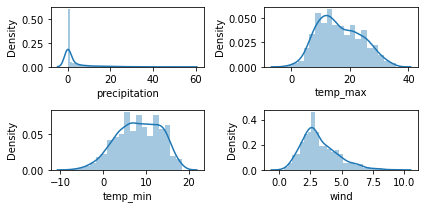

In [7]:
#plotting distplot of all the numerical columns at once
n_rows=3
n_cols=2
counter=1
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.distplot(df.loc[:,i])
    counter+=1
plt.tight_layout()

## bivariate analysis

target variable is weather

<AxesSubplot:xlabel='weather', ylabel='temp_min'>

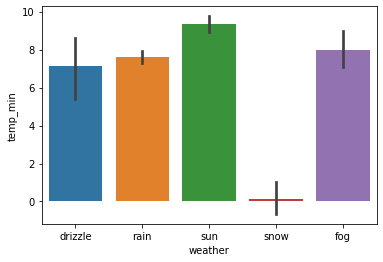

In [8]:
sns.barplot(df.weather,df.temp_min)

maximum temp is in sum weather and minimum temp in snow

<AxesSubplot:xlabel='weather', ylabel='wind'>

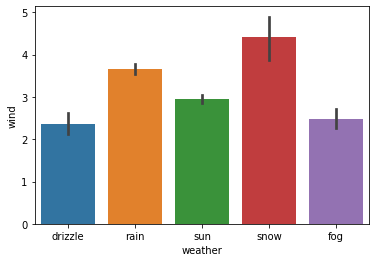

In [9]:
sns.barplot(df.weather,df.wind)

snowfall leads to more wind speed

In [10]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


<AxesSubplot:xlabel='weather', ylabel='temp_max'>

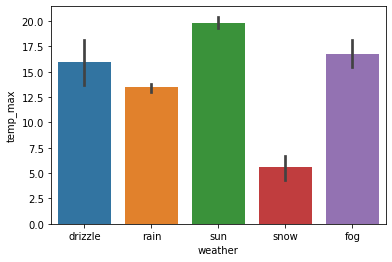

In [11]:
sns.barplot(df.weather,df.temp_max)

maximum temperature is in sun weather

<AxesSubplot:xlabel='weather', ylabel='precipitation'>

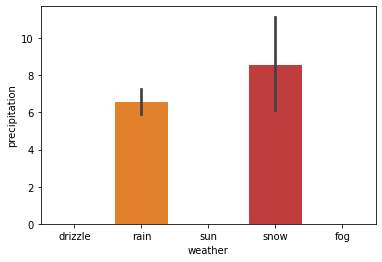

In [12]:
sns.barplot(df.weather,df.precipitation)

In [13]:
#snow has maximum precipitation

<AxesSubplot:>

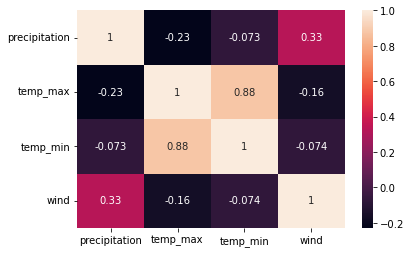

In [14]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='weather', ylabel='count'>

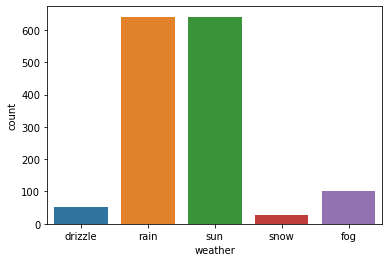

In [15]:
sns.countplot(df.weather)

In [16]:
##seattle has more rain and sum weather

## Feature Engineering

removing outliers

<AxesSubplot:xlabel='precipitation'>

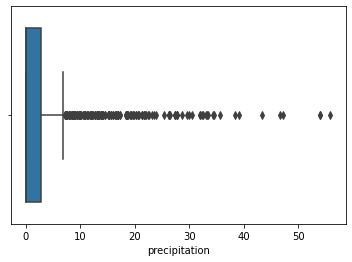

In [17]:
sns.boxplot(df['precipitation'])

q1=np.quantile(df.precipitation,0.25)
q2=np.quantile(df['precipitation'],0.75)
iqr=q2-q1
outlier_values = df.precipitation[(df.precipitation> iqr + 1.5 * iqr) | (df['precipitation']< iqr - 1.5*iqr) ]

In [18]:
q1=np.quantile(df.precipitation,0.25) 
q3=np.quantile(df['precipitation'],0.75) 
iqr=q3-q1
print('lower limit is ',q1-iqr*q3)
print('upper limit is ',q3+iqr*q1)
print('inter quantile range is ',iqr)

lower limit is  -7.839999999999999
upper limit is  2.8
inter quantile range is  2.8


In [19]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<AxesSubplot:xlabel='precipitation'>

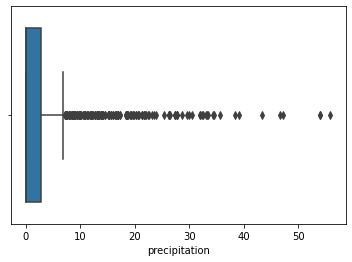

In [20]:
sns.boxplot(df['precipitation'])

In [22]:
#defining a function to remove the outliers
def outlierhtao(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    df_final=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]
    return df_final

In [23]:
df1=df.drop(['weather','date'],axis=1)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
dtypes: float64(4)
memory usage: 45.8 KB


In [25]:
#applying the outlier removal function
final_df=df1.apply(outlierhtao)

In [26]:
#again joining the both dataset containing numerical and object variables
final_df=final_df.merge(df,how='inner')

In [27]:
final_df

,precipitation,temp_max,temp_min,wind,date,weather
0,0.0,12.8,5.0,4.7,2012-01-01,drizzle
1,0.8,11.7,7.2,2.3,2012-01-03,rain
2,1.3,8.9,2.8,6.1,2012-01-05,rain
3,2.5,4.4,2.2,2.2,2012-01-06,rain
4,0.0,7.2,2.8,2.3,2012-01-07,rain
...,...,...,...,...,...,...
1254,0.0,4.4,0.0,2.5,2015-12-26,sun
1255,1.5,5.0,1.7,1.3,2015-12-28,rain
1256,0.0,7.2,0.6,2.6,2015-12-29,fog
1257,0.0,5.6,-1.0,3.4,2015-12-30,sun


In [28]:
final_df['weather'].value_counts()

sun        656
rain       432
fog        102
drizzle     56
snow        13
Name: weather, dtype: int64

In [29]:
le=LabelEncoder()

In [30]:
final_df['weather']=le.fit_transform(final_df['weather'])

In [31]:
final_df['weather'].value_counts()

4    656
2    432
1    102
0     56
3     13
Name: weather, dtype: int64

drizzle=0
fog=1
rain=2
snow=3
sun=4

In [32]:
x=final_df.drop(['date','weather'],axis=1)
y=final_df['weather']

In [33]:
#splitting the dataset 
from sklearn.model_selection import train_test_split

In [34]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
ss=StandardScaler()

In [36]:
#fitting standard scaler
xtrain=ss.fit_transform(xtrain)
xtest=ss.fit_transform(xtest)

## RANDOM FOREST WITH 78% accuracy

In [37]:
#Random forest
rfc=RandomForestClassifier(n_estimators=200)
#fitting random forest
rfc.fit(xtrain,ytrain)
#accuracy
rfc.score(xtest,ytest)

0.7817460317460317

In [38]:
yp = rfc.predict(xtest)
c=confusion_matrix(ytest,yp)

In [39]:
c #confusion matrix

array([[  0,   0,   0,   0,   8],
       [  0,   2,   0,   0,  20],
       [  0,   0,  72,   0,  10],
       [  0,   0,   3,   0,   0],
       [  6,   6,   2,   0, 123]])

## RANDOM FOREST WITH 85%

lets test only on rainy sunny and snow weather

In [40]:
index=final_df[final_df['weather']==0].index
index1=final_df[final_df['weather']==1].index
##getting indexes of drizzle and fogg

In [41]:
#dropping drizzle
final_df1=final_df.drop(index=index,axis=0)

In [42]:
#dropping fogg
final_df1=final_df.drop(index=index1,axis=0)

In [49]:
#test train split and standard scaling
x1=final_df.drop(['date','weather'],axis=1)
y1=final_df['weather']
x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.2,random_state=12)
x1train=ss.fit_transform(x1train)
x1test=ss.fit_transform(x1test)

In [50]:
#applying random forest
rfc=RandomForestClassifier(n_estimators=200)
rfc.fit(x1train,y1train)

RandomForestClassifier(n_estimators=200)

In [51]:
#Accuracy score
rfc.score(x1test,y1test)*100

84.52380952380952